# Visualización Parcial 2

Laurent Hartwich.

Código para `Julia 1.11.1`

## Función para visualizar

In [1]:
using DelimitedFiles, GLMakie

In [2]:
function plot(filename, plotname = "")
    # asignar datos
    data = readdlm(filename)
    zs = data[4:end-1, 1]
    Es = data[4:end-1, 2]
    Hs = data[4:end-2, 3]

    # calcular red intermedia para H
    dz = zs[2] - zs[1]
    zs_offset = zs[1:end-1] .+ dz

    # graficar
    GLMakie.activate!(inline = true)
    fig = Figure()
    ax = Axis3(fig[1,1], title = plotname)
        ax.xlabel = L"H_y\,(z)"
        ax.ylabel = L"z"
        ax.zlabel = L"E_x\,(z)"
        ax.yreversed = true
    lines!(ax, zeros(length(Es)), zs, Es)
    lines!(ax, Hs, zs_offset, zeros(length(Hs)))
    display(fig)
end

plot (generic function with 2 methods)

## Comparación Condiciones Reflexivas / Periódicas

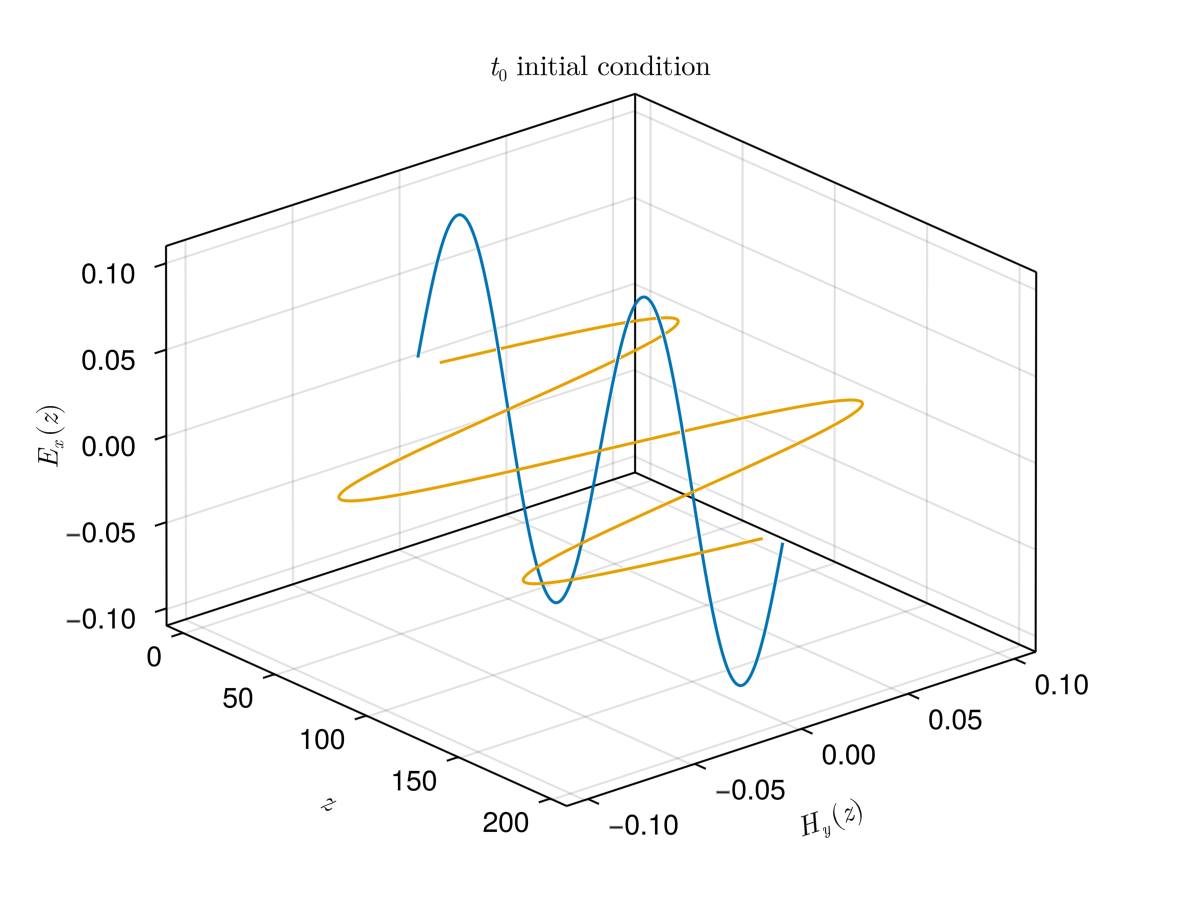

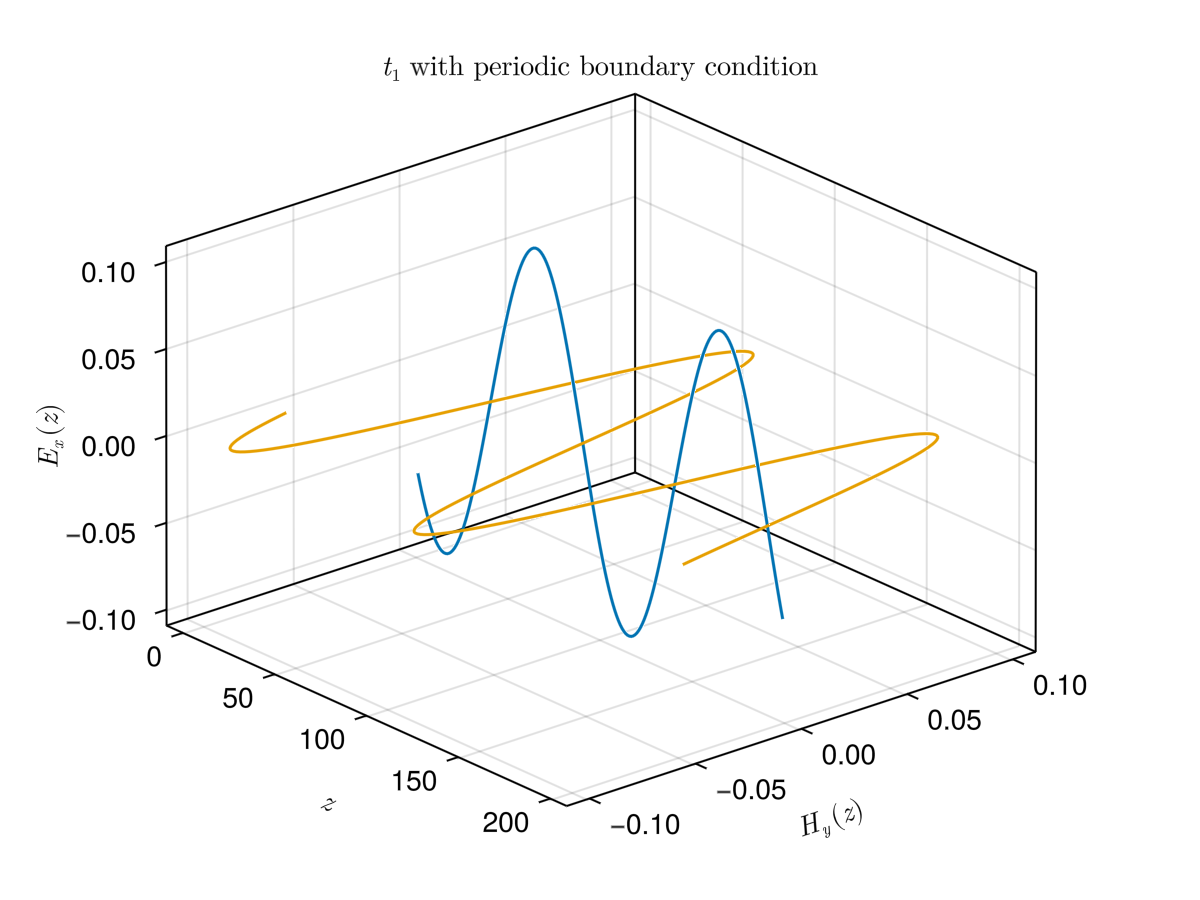

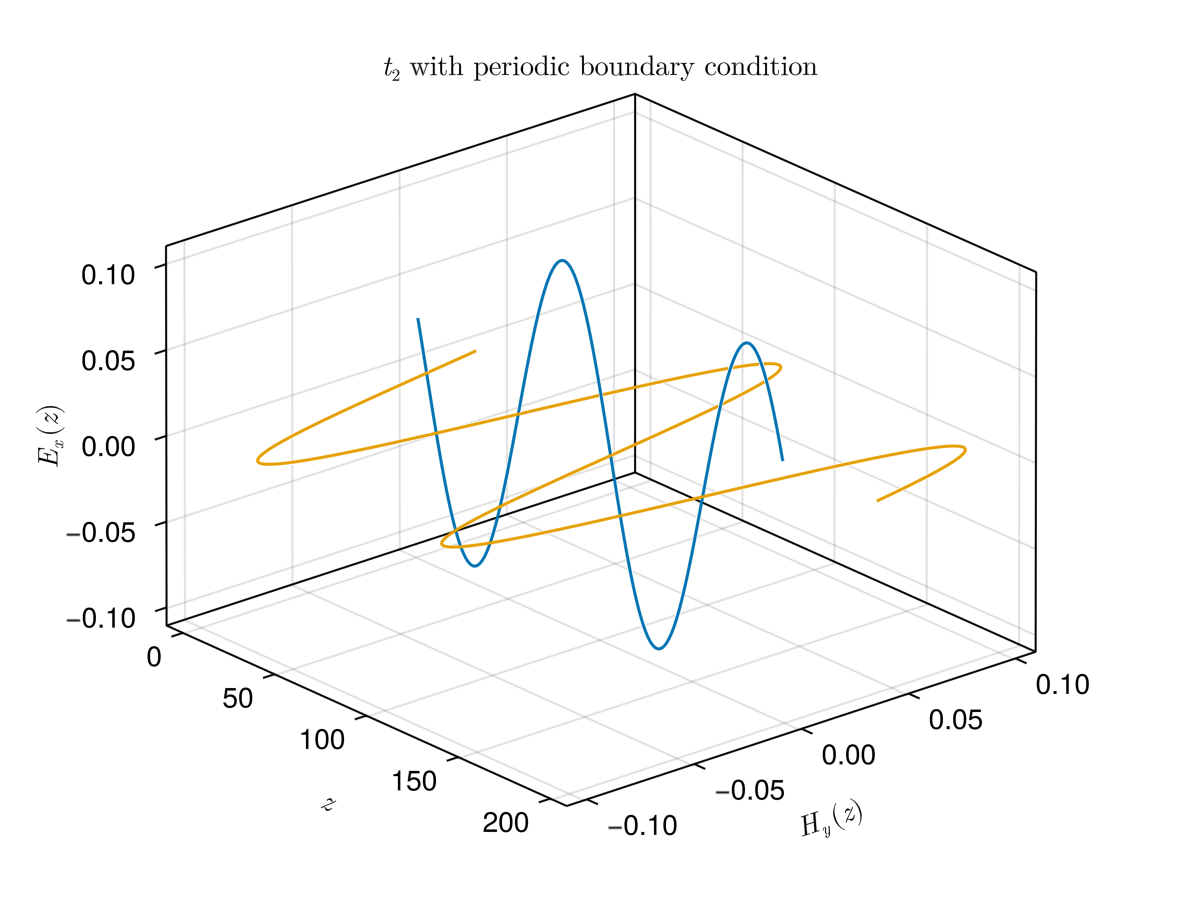

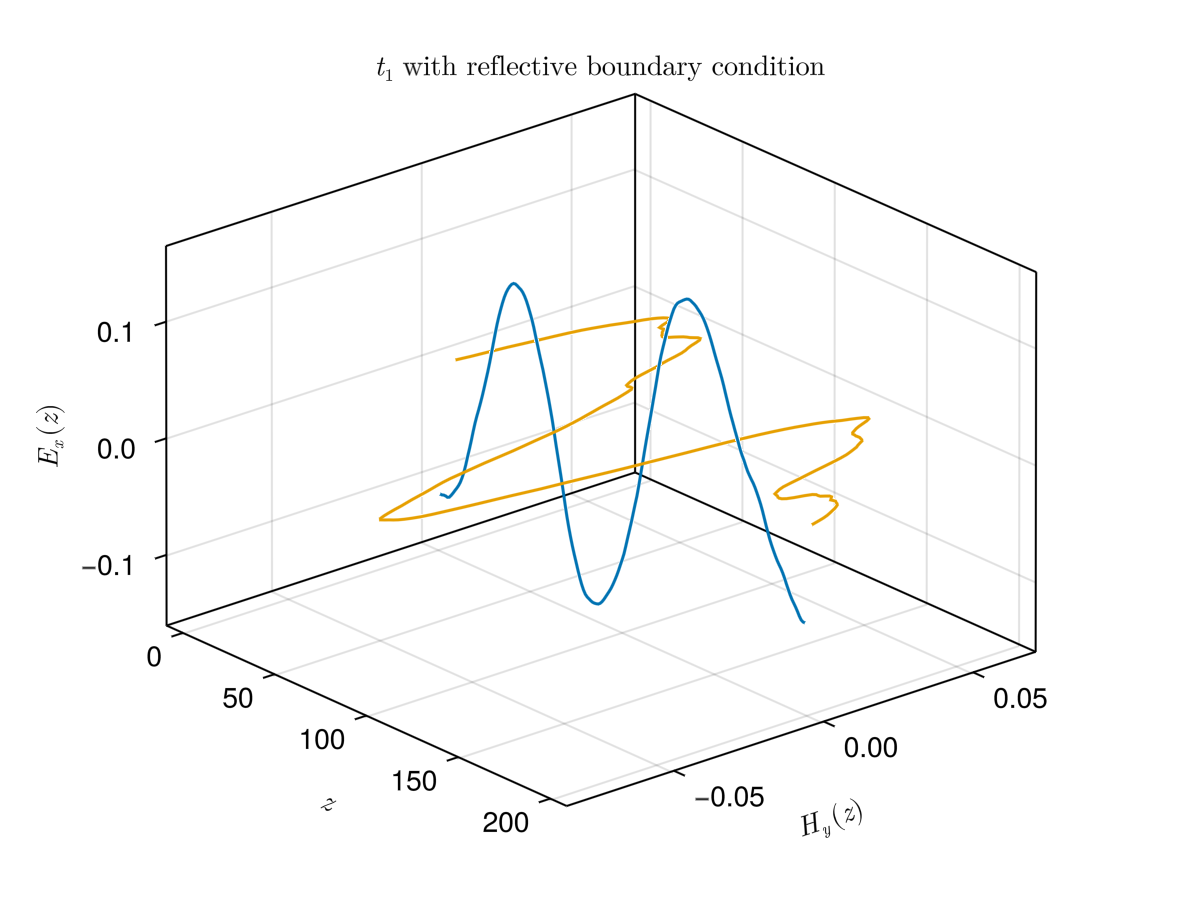

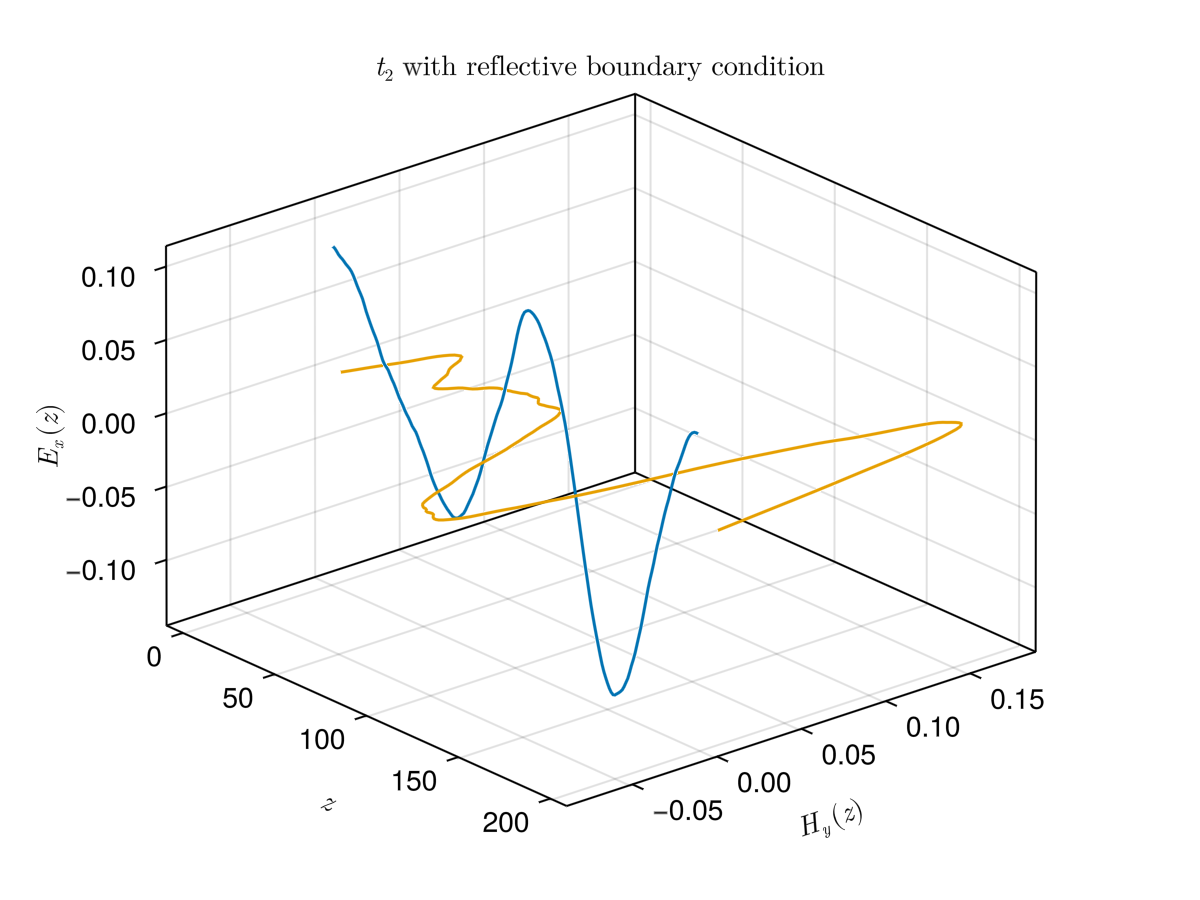

In [3]:
filenames = (
    "initial_condition.txt",
    "not_reflective_t1.txt",
    "not_reflective_t2.txt",
    "reflective_t1.txt",
    "reflective_t2.txt"
)

plotnames = (
    L"$t_0$ initial condition",
    L"$t_1$ with periodic boundary condition",
    L"$t_2$ with periodic boundary condition",
    L"$t_1$ with reflective boundary condition",
    L"$t_2$ with reflective boundary condition"
)

for (filename, plotname) in zip(filenames, plotnames) plot(filename, plotname) end

## Investigación de la Estabilidad

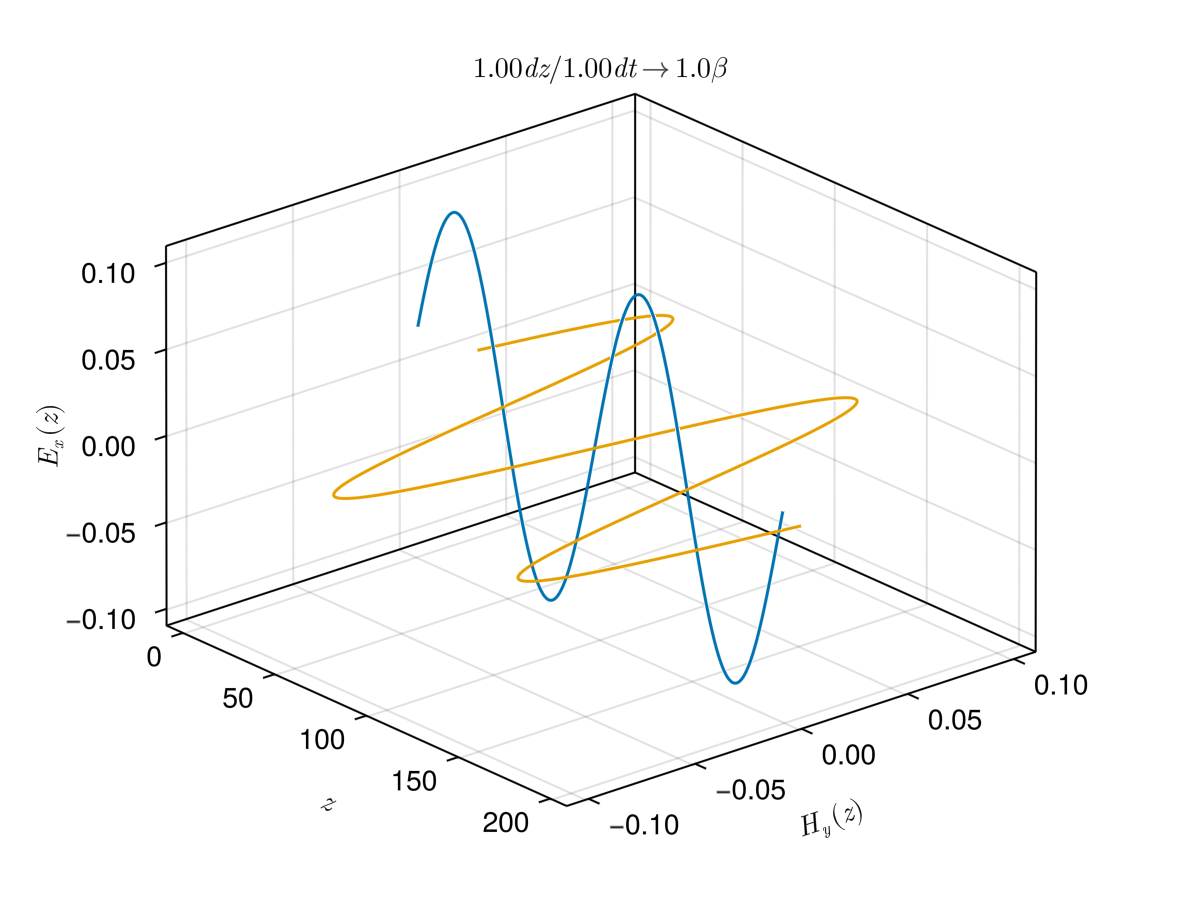

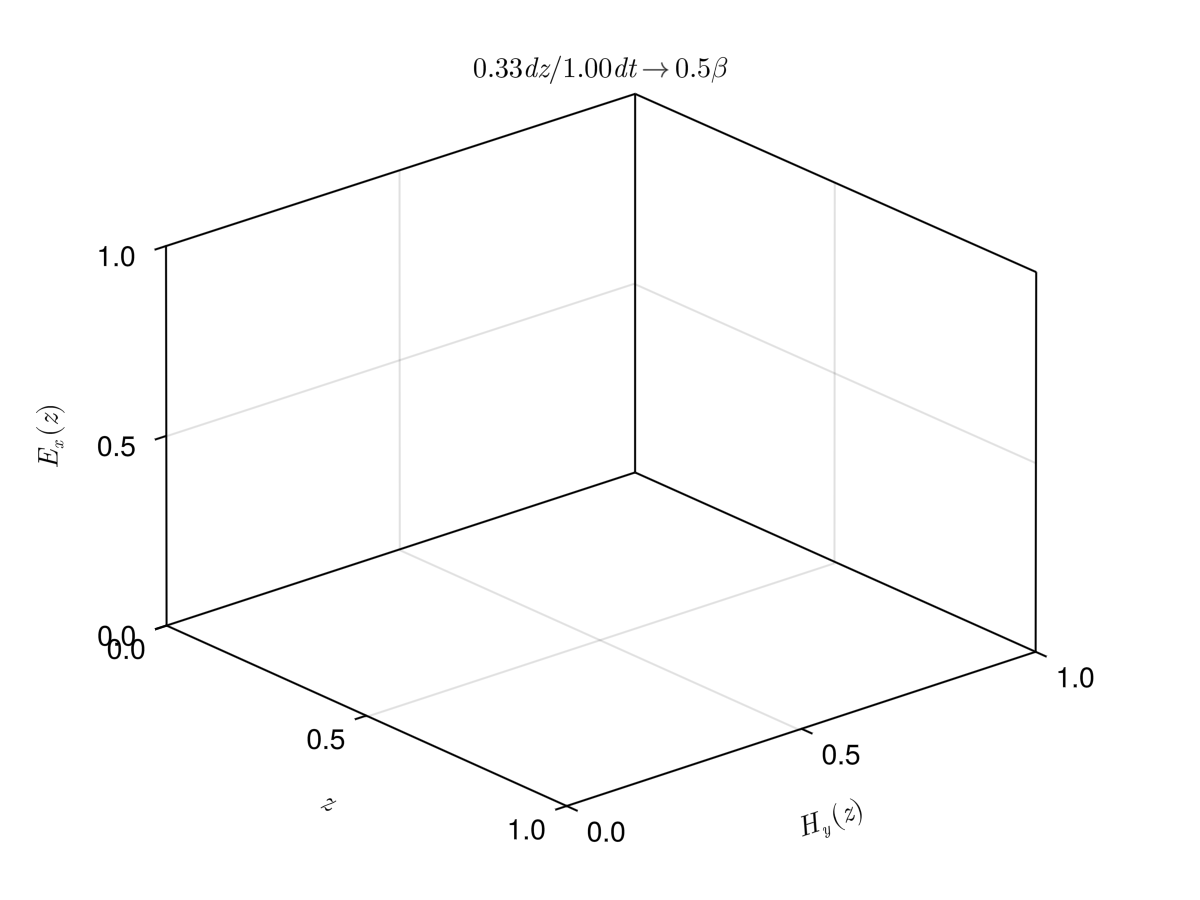

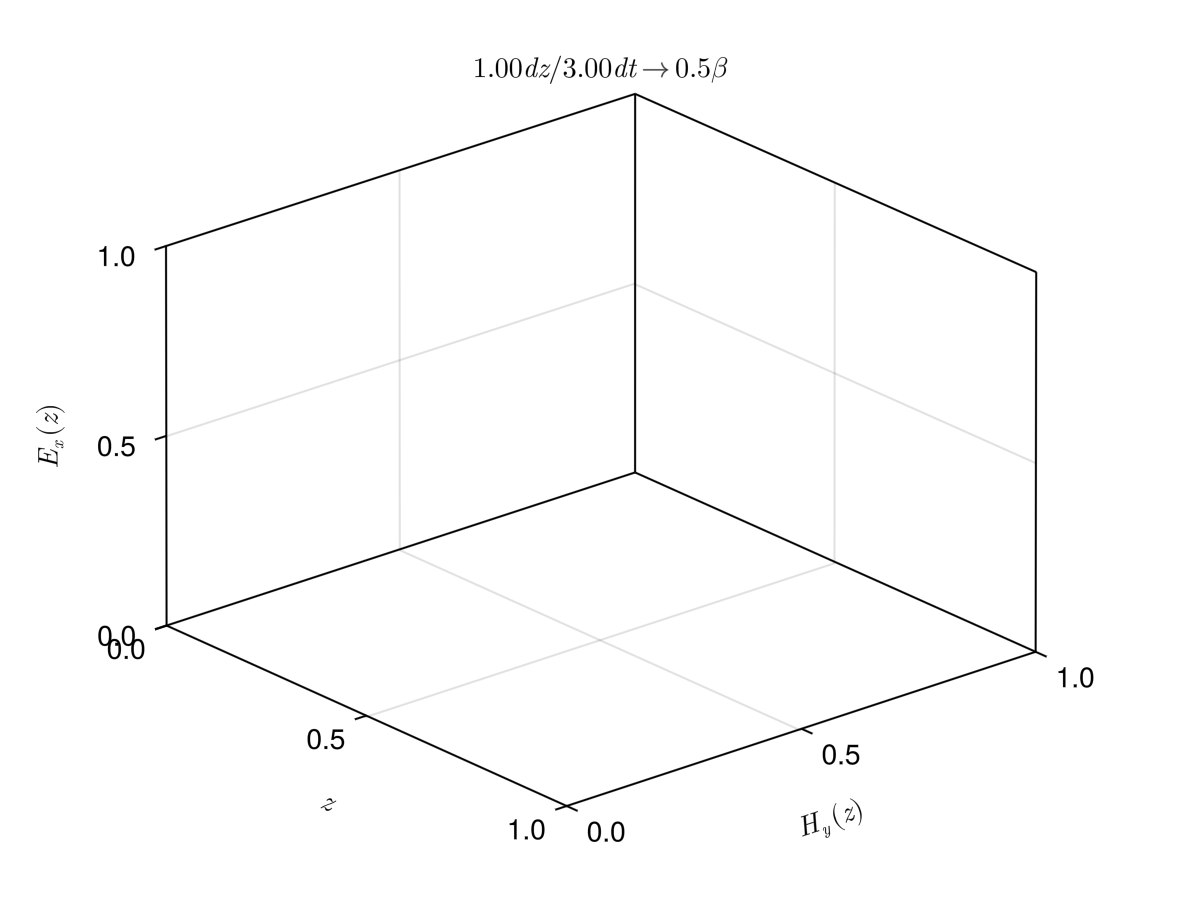

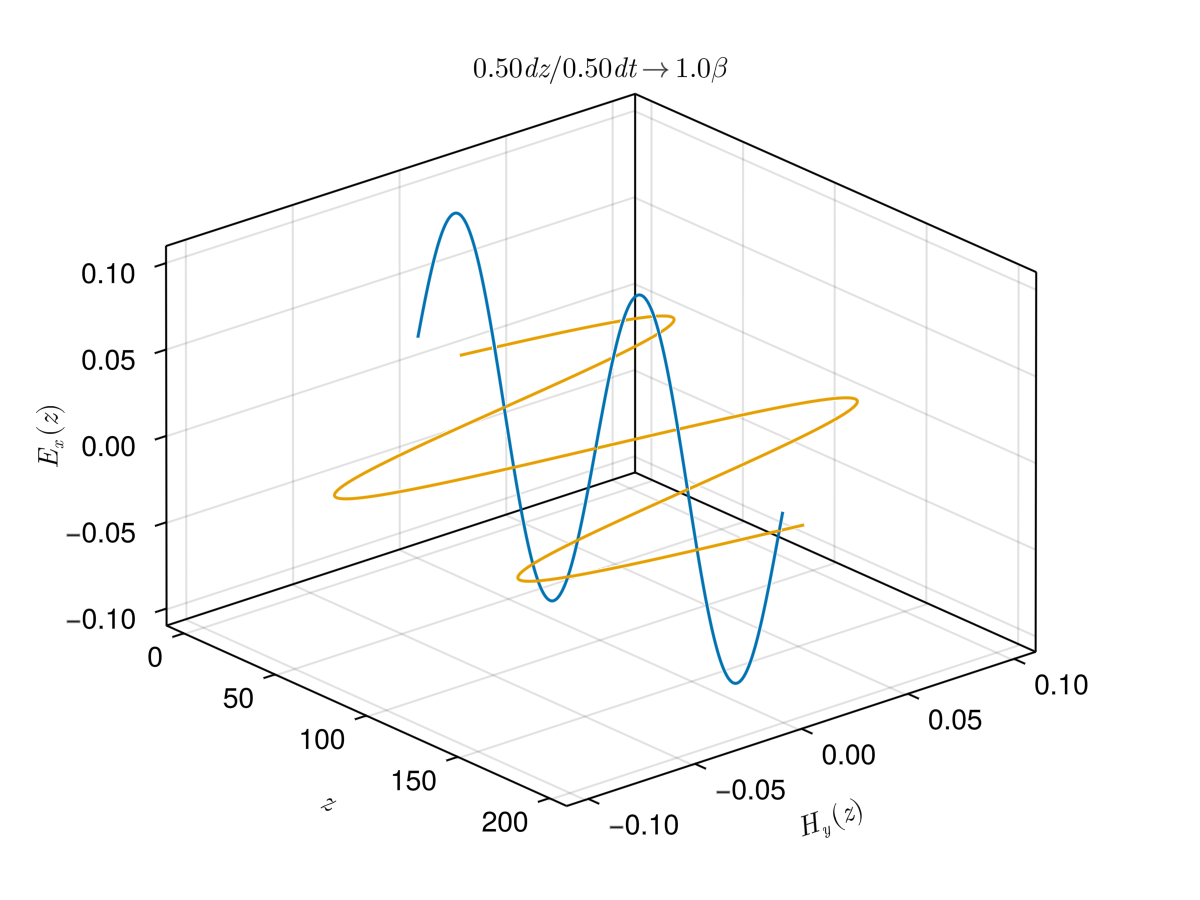

In [4]:
filenames = (
    "1_dz_1_dt.txt",
    "033_dz_1_dt.txt",
    "1_dz_3_dt.txt",
    "05_dz_05_dt.txt"
)

plotnames = (
    L"$1.00 dz / 1.00 dt \rightarrow 1.0 \beta$",
    L"$0.33 dz / 1.00 dt \rightarrow 0.5 \beta$",
    L"$1.00 dz / 3.00 dt \rightarrow 0.5 \beta$",
    L"$0.50 dz / 0.50 dt \rightarrow 1.0 \beta$"
)

for (filename, plotname) in zip(filenames, plotnames) plot(filename, plotname) end